In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('C:\\Users\\sarveshwar\\Random\\avocado.csv')

In [ ]:
data.shape

(18249, 14)

In [ ]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [ ]:
data.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# a.    How the prices of avocado vary from time to time

A - SanFrancisco

In [ ]:
data["Date"]=pd.to_datetime(data["Date"],format='%Y-%m-%d')
data["Year"]=data["Date"].dt.year
data["Month"]=data["Date"].dt.month
data["Day"]=data["Date"].dt.day
data=data.sort_values(["Year","Month","Day"])
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,2015,1,4
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,2015,1,4
155,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,2015,1,4


In [ ]:
Region_grouped = data.groupby('Date')['AveragePrice'].mean().reset_index()

In [ ]:
Region_grouped.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


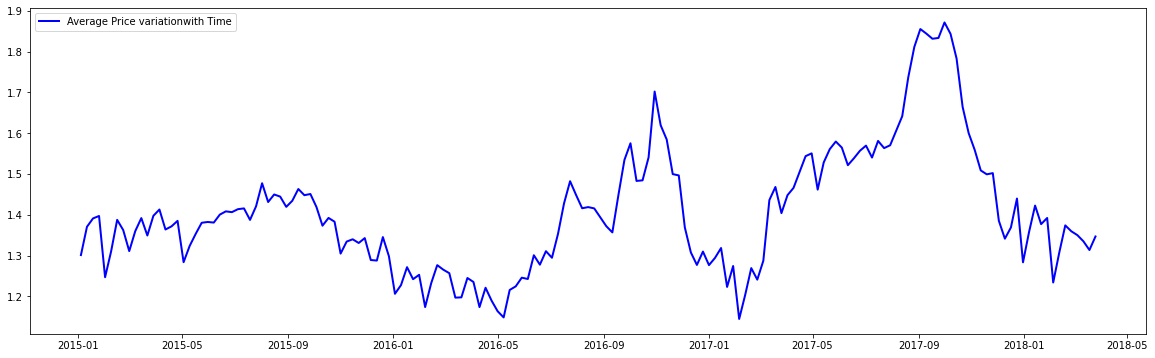

In [ ]:
Region_grouped
plt.figure(figsize=(20,6))
plt.plot(Region_grouped['Date'], Region_grouped['AveragePrice'], label='Average Price variationwith Time', linewidth=2, color='blue')
plt.legend()

# b.    Which Areas sell avocado at a very high price

A- HartfordSpringfield

In [ ]:
data[['Date','region']].duplicated()

51       False
103      False
155      False
207      False
259      False
         ...  
18189     True
18201     True
18213     True
18225     True
18237     True
Length: 18249, dtype: bool

In [ ]:
data_regionwise = data.groupby('region')['AveragePrice'].mean()

In [ ]:
data_regionwise = pd.DataFrame(data_regionwise)

In [ ]:
data_regionwise.dtypes

AveragePrice    float64
dtype: object

In [ ]:
data_regionwise[data_regionwise['AveragePrice']==data_regionwise['AveragePrice'].max()]

,AveragePrice
region,
HartfordSpringfield,1.818639


# c.     In which year, the prices of avocado were the highest

A -  2017

In [ ]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,2015,1,4
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,2015,1,4
155,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,2015,1,4


In [ ]:
data_yearwise = data.groupby('year')['AveragePrice'].mean().reset_index()

In [ ]:
data_yearwise.head()

,year,AveragePrice
0,2015,1.375590
1,2016,1.338640
2,2017,1.515128
3,2018,1.347531


In [ ]:
data_yearwise.sort_values('AveragePrice', ascending=False)

,year,AveragePrice
2,2017,1.515128
0,2015,1.375590
3,2018,1.347531
1,2016,1.338640


# d.     Which areas are having highest demand for avocado

A - TotalUS

In [ ]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,2015,1,4
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,2015,1,4
155,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,2015,1,4


In [ ]:
data_Demandwsie = data.groupby('region')['Total Bags'].sum()

In [ ]:
data_Demandwsie = pd.DataFrame(data_Demandwsie)

In [ ]:
data_Demandwsie.sort_values('Total Bags', ascending=False).head()

,Total Bags
region,
TotalUS,1.638601e+09
West,3.670736e+08
California,2.466822e+08
SouthCentral,2.333924e+08
Northeast,1.969884e+08


# e.     Which type of avocado is more popular

A - conventional

In [ ]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,2015,1,4
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,2015,1,4
155,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,2015,1,4


In [ ]:
data_typewise = data.groupby('type')['Total Volume'].sum().reset_index()

In [ ]:
data_typewise.sort_values('Total Volume', ascending=False)

,type,Total Volume
0,conventional,1.508722e+10
1,organic,4.361817e+08


# f.   Research: Why the price of avocado is so high

# Three reasons Fueling the price increase are:
1 Demand

  Avacado demand has not only gone up for US but worldwide. As we know, demand has direct relation with price of a product.
    
2 Less Supply

  Supply is  inversly related to the  price of a product. Since avocado trees take longer to reach maturity than people are    
 consuming, there is a gap left unfulfilled, leading to more demand than supply causing skyrocketting price for Avacado
  Hass avocados in the USA are mostly from California, 80% to be precise. Further, California has been experiencing a series of unfortunate events for some years now. In December 2017, California experienced wildfires that could be affecting the trees to date. Some trees were entirely burnt while those that remained may have internal damage that curtails the production of avocados leading to low supply hence high prices.
  
3 Change in Life Style

People are becoming more health conscious than ever. With the high cases of diabetes, heart diseases, and obesity, everyone is 
trying to ensure they have balanced meals leading to raise in price as more consumption will lead to hefty price tag in Avacado. 
 
